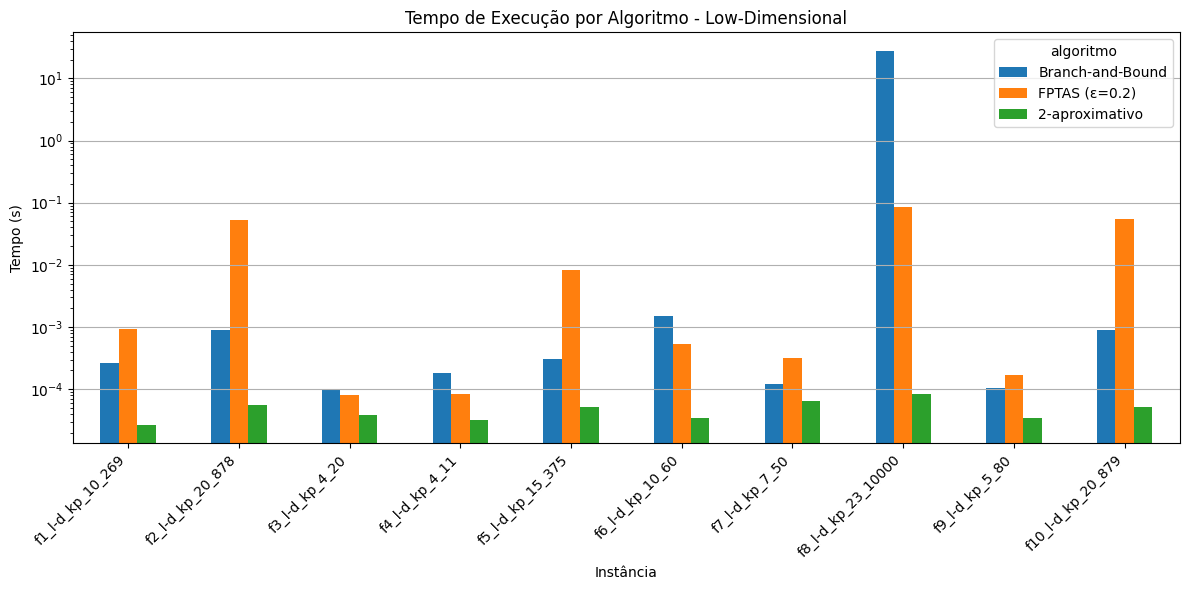

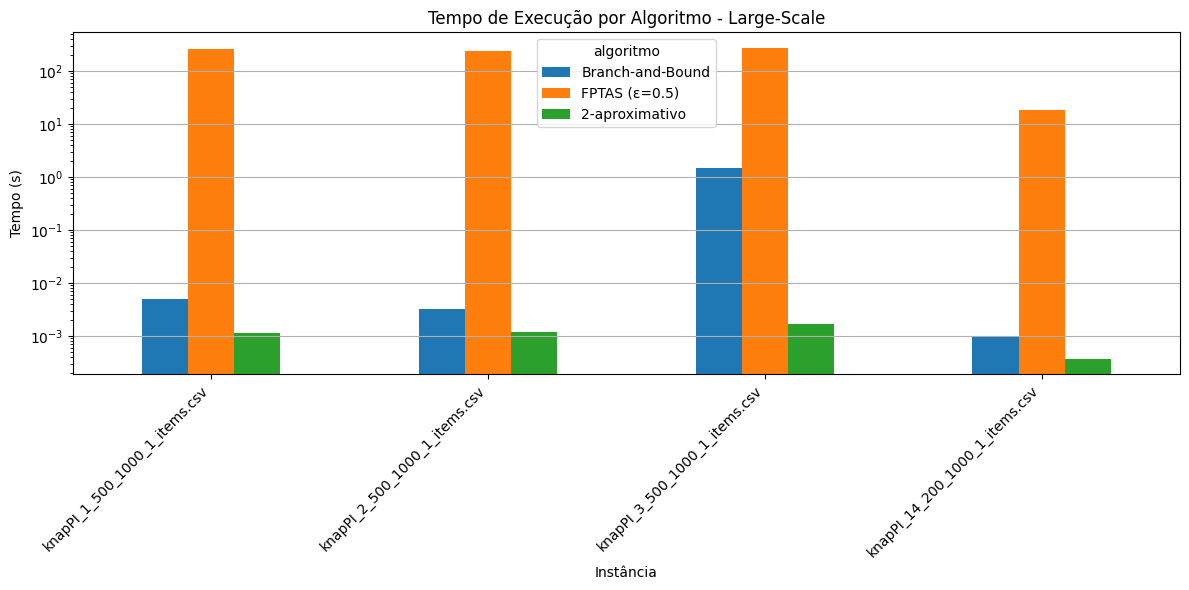

In [85]:
import pandas as pd
import matplotlib.pyplot as plt
import re
from pandas.api.types import CategoricalDtype

def natural_sort_key(s):
    return [int(text) if text.isdigit() else text.lower() for text in re.split('([0-9]+)', s)]

df = pd.read_csv("resultados_convertidos.csv")

df_low = df[df["tipo"] == "low-dimensional"].copy()
low_order = sorted(df_low['instancia'].unique(), key=natural_sort_key)
df_low['instancia'] = pd.Categorical(df_low['instancia'], categories=low_order, ordered=True)

df_large = df[df["tipo"] == "large-scale"].copy()
large_order = sorted(df_large['instancia'].unique(), key=natural_sort_key)
df_large['instancia'] = pd.Categorical(df_large['instancia'], categories=large_order, ordered=True)

tempo_low = df_low.pivot_table(index="instancia", columns="algoritmo", values="tempo", sort=False, observed=False)
tempo_large = df_large.pivot_table(index="instancia", columns="algoritmo", values="tempo", sort=False, observed=False)

tempo_low.plot(kind='bar', figsize=(12, 6), logy=True, title='Tempo de Execução por Algoritmo - Low-Dimensional')
plt.ylabel('Tempo (s)')
plt.xlabel('Instância')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(True, axis='y')
plt.show()

tempo_large.plot(kind='bar', figsize=(12, 6), logy=True, title='Tempo de Execução por Algoritmo - Large-Scale')
plt.ylabel('Tempo (s)')
plt.xlabel('Instância')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(True, axis='y')
plt.show()

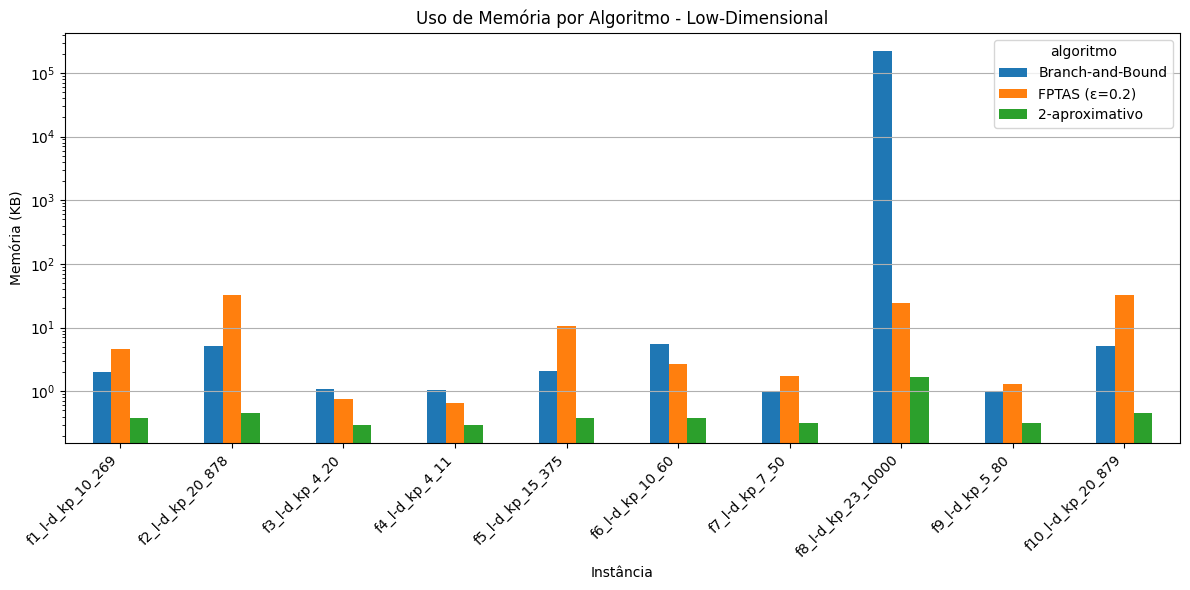

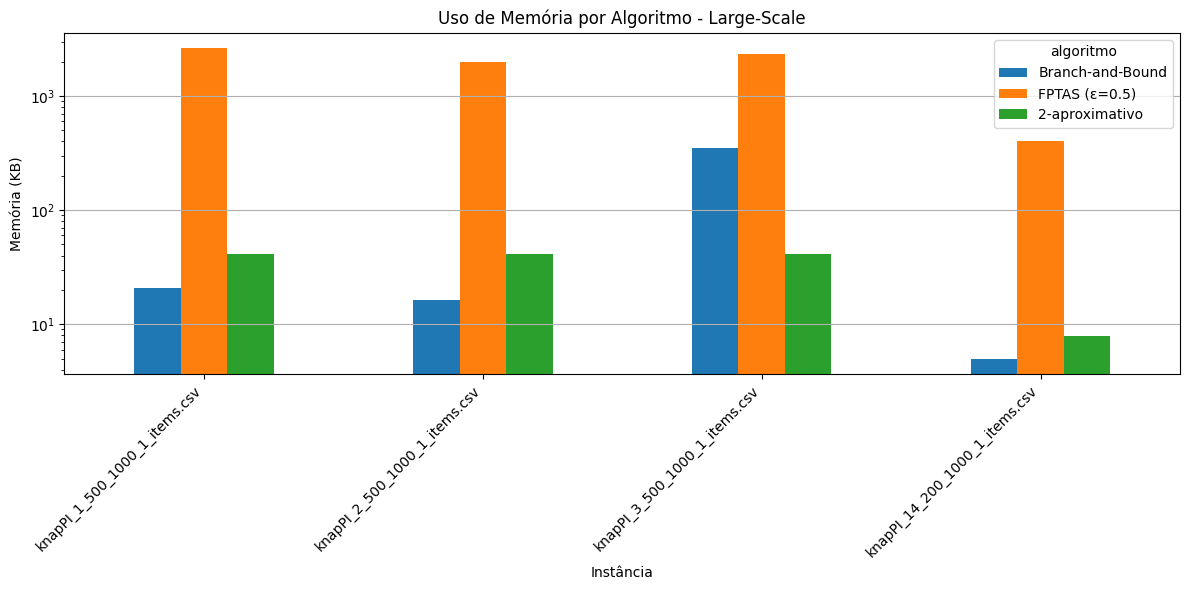

In [86]:

df_low = df[df["tipo"] == "low-dimensional"].copy()
df_large = df[df["tipo"] == "large-scale"].copy()

low_order = sorted(df_low['instancia'].unique(), key=natural_sort_key)
df_low['instancia'] = pd.Categorical(df_low['instancia'], categories=low_order, ordered=True)

large_order = sorted(df_large['instancia'].unique(), key=natural_sort_key)
df_large['instancia'] = pd.Categorical(df_large['instancia'], categories=large_order, ordered=True)

memoria_low = df_low.pivot_table(index="instancia", columns="algoritmo", values="memoria_kb", sort=False, observed=False)
memoria_large = df_large.pivot_table(index="instancia", columns="algoritmo", values="memoria_kb", sort=False, observed=False)

memoria_low.plot(kind='bar', figsize=(12,6), logy=True, title='Uso de Memória por Algoritmo - Low-Dimensional')
plt.ylabel('Memória (KB)')
plt.xlabel('Instância')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(True, axis='y')
plt.show()

memoria_large.plot(kind='bar', figsize=(12,6), logy=True, title='Uso de Memória por Algoritmo - Large-Scale')
plt.ylabel('Memória (KB)')
plt.xlabel('Instância')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(True, axis='y')
plt.show()

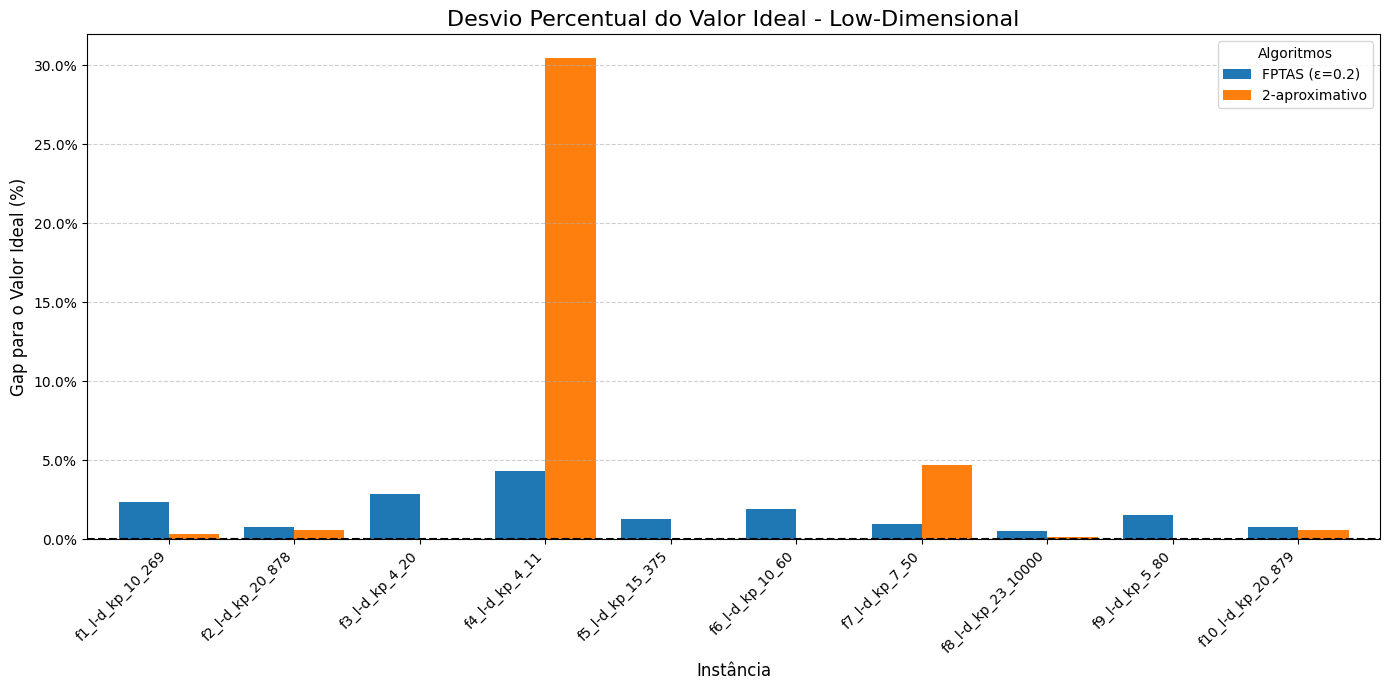

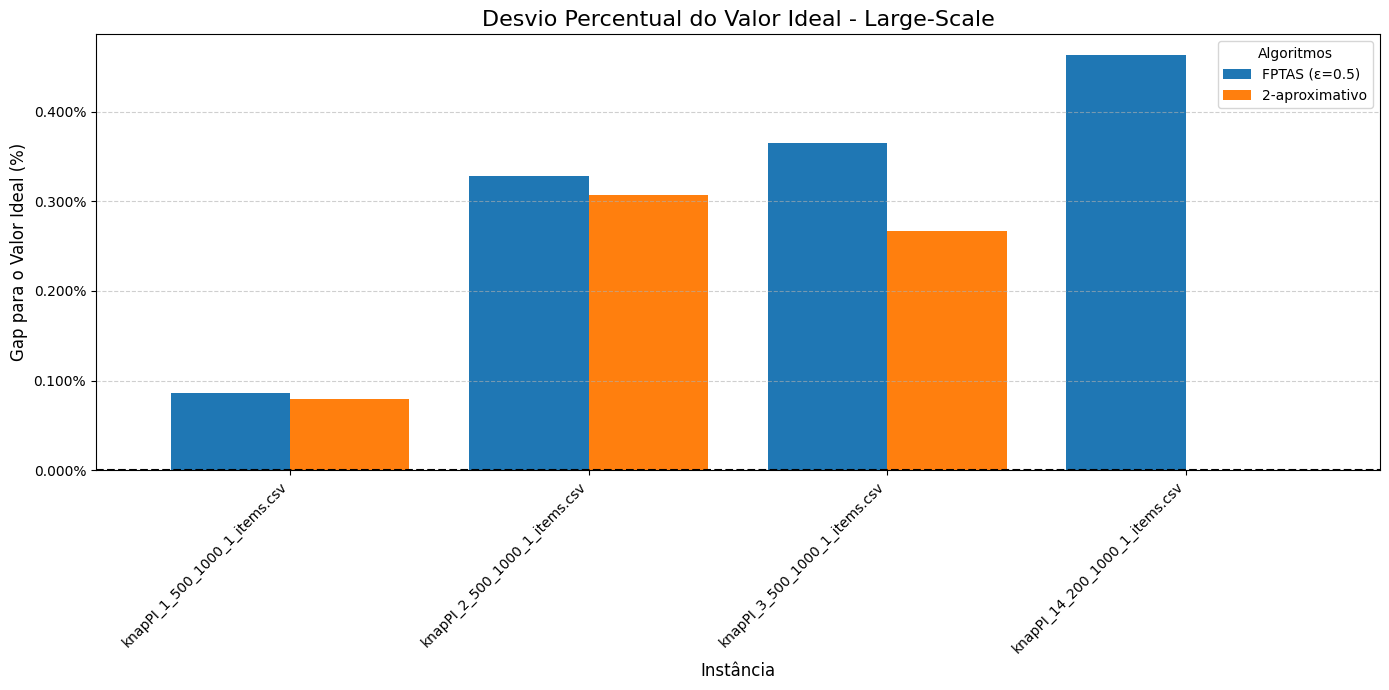

In [87]:
def plotar_desvio_percentual(df_tipo, titulo):
    pivot_valores = df_tipo.pivot_table(index="instancia", columns="algoritmo", values="valor", sort=False, observed=False)

    valor_ideal = pivot_valores['Branch-and-Bound']

    algoritmos_heuristicos = pivot_valores.drop(columns=['Branch-and-Bound'])

    df_desvio = pd.DataFrame()
    for col in algoritmos_heuristicos.columns:
        df_desvio[col] = ((valor_ideal - algoritmos_heuristicos[col]) / valor_ideal) * 100

    ax = df_desvio.plot(kind='bar', figsize=(14, 7), width=0.8)

    plt.title(titulo, fontsize=16)
    plt.ylabel('Gap para o Valor Ideal (%)', fontsize=12)
    plt.xlabel('Instância', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.grid(True, which="both", ls="--", axis='y', alpha=0.6)
    plt.legend(title='Algoritmos')

    ax.axhline(0, color='black', linewidth=1.5, linestyle='--')

    from matplotlib.ticker import PercentFormatter
    ax.yaxis.set_major_formatter(PercentFormatter())

    plt.tight_layout()
    plt.show()

df = pd.read_csv("resultados_convertidos.csv")

df_low = df[df["tipo"] == "low-dimensional"].copy()
df_large = df[df["tipo"] == "large-scale"].copy()

low_order = sorted(df_low['instancia'].unique(), key=natural_sort_key)
df_low['instancia'] = pd.Categorical(df_low['instancia'], categories=low_order, ordered=True)

large_order = sorted(df_large['instancia'].unique(), key=natural_sort_key)
df_large['instancia'] = pd.Categorical(df_large['instancia'], categories=large_order, ordered=True)

plotar_desvio_percentual(df_low, 'Desvio Percentual do Valor Ideal - Low-Dimensional')
plotar_desvio_percentual(df_large, 'Desvio Percentual do Valor Ideal - Large-Scale')